  
*Generated from a Jupyter Notebook - [Sources](https://github.com/bebatut/neuromac_GF_mices/blob/master/src/postvisualization.ipynb)*

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/gene_length.RData")
load("../results/dge/filtered_metadata.RData")
load("../results/dge/dge.RData")
load("../results/dge/contrasts.RData")
load("../results/dge/filtered_norm_counts.RData")
load("../results/dge/filtered_z_scores.RData")
load("../results/dge/dge_net_pal2.RData")
load("../results/dge/col_order.RData")
load("../results/dge/annot_col.RData")
load("../results/dge/annot_colors.RData")
load("../results/dge/genes_in_modules.RData")
load("../results/dge/all_deg_genes.RData")

# Z-scores (normalized counts) for DE genes in any condition

pdf 
  2

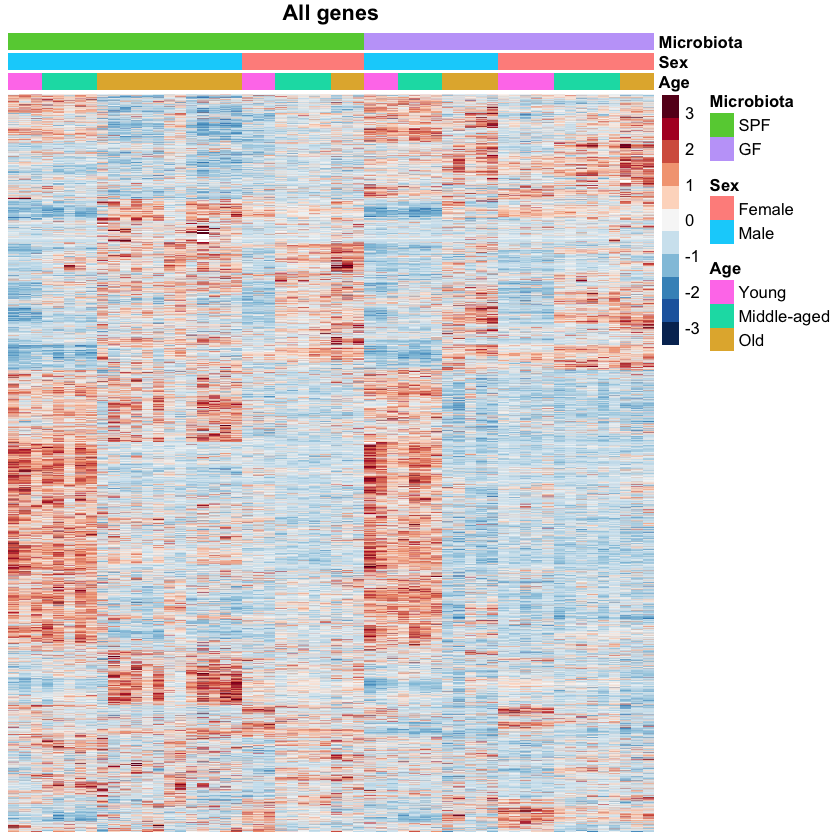

In [4]:
plot_z_score_heatmap(z_scores,
                     all_deg_genes,
                     col_order$msa,
                     annot_col$msa,
                     "All genes",
                     col_order$msa)
pdf('../results/dge/postvisualization/z_score_msa.pdf')
plot_z_score_heatmap(z_scores,
                     all_deg_genes,
                     col_order$msa,
                     annot_col$msa,
                     "All genes",
                     col_order$msa)
dev.off()

# Z-scores of CML vs PBS DEGs in Old samples

In [8]:
cml_pbs_deg = read.csv("../data/cml_pbs_deg.tabular", sep="\t")
head(cml_pbs_deg)

In [27]:
dim(cml_pbs_deg)

[1] 26 15

In [78]:
cml_results$Gene

[1] "S100a8"        "Ngp"           "Ltf"           "Camp"         
 [5] "Chil3"         "Lcn2"          "S100a9"        "C4b"          
 [9] "Farp1"         "Cd177"         "Vsig10"        "Cers4"        
[13] "Ttc37"         "Hspa1b"        "Rabl3"         "Itpr3"        
[17] "Foxn2"         "Zfp414"        "Gm26917"       "4933417C20Rik"
[21] "Gm37298"       "Hsph1"         "Gm37352"       "Uprt"         
[25] "4930518I15Rik" "Gm43984"

DEGs for CML vs PBS, not found in the Z-scores

In [28]:
cml_results$Gene[! cml_results$Gene %in% rownames(z_scores)]

[1] "Gm26917"       "4933417C20Rik" "Gm37298"       "Gm37352"      
[5] "4930518I15Rik" "Gm43984"

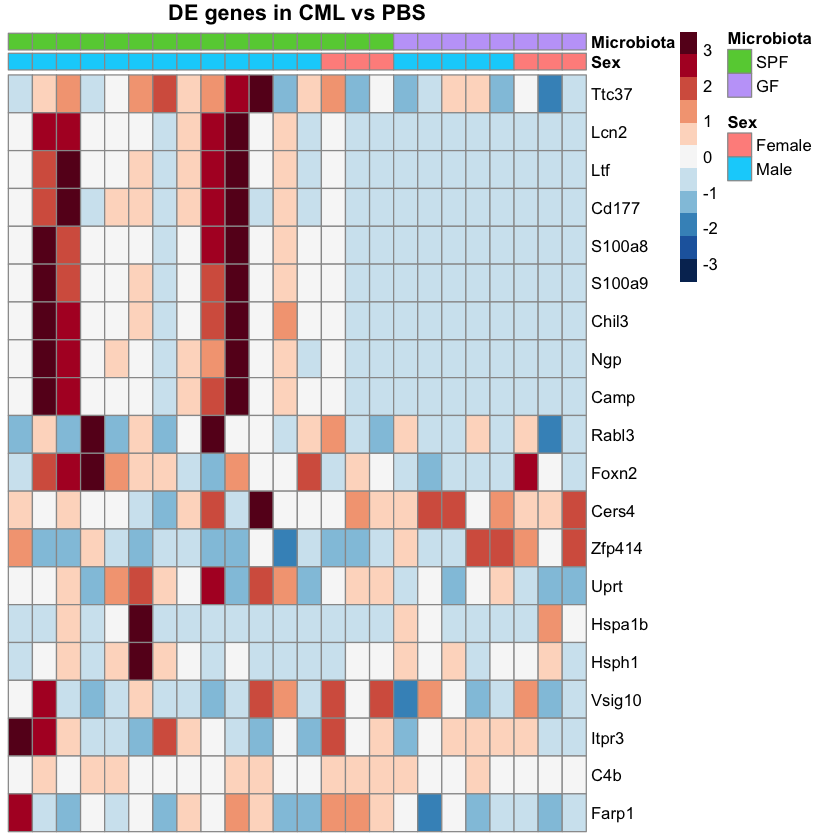

In [74]:
annot = annot_col$msa %>%
    rownames_to_column('sample') %>%
    filter(Age == 'Old' ) %>%
    select(-Age)
order = col_order$msa[col_order$msa %in% annot$sample]
samples = annot$sample
annot = annot %>% select(-sample) %>% as.data.frame
rownames(annot) = samples
de_genes = cml_results$Gene
de_genes = de_genes[de_genes %in% rownames(z_scores)]
data = z_scores[de_genes,]
hc = hclust(dist(data[,order]), method = "complete")
pheatmap(data[hc$order, order],
        cluster_rows=F,
        cluster_cols=F,
        show_rownames=T,
        show_colnames=F,
        annotation_col=annot,
        annotation_row=NULL,
        annotation_colors = annot_colors,
        color=rev(brewer.pal(11, "RdBu")),
        breaks = seq(-3.5, 3.5, length=12),
        main = "DE genes in CML vs PBS")